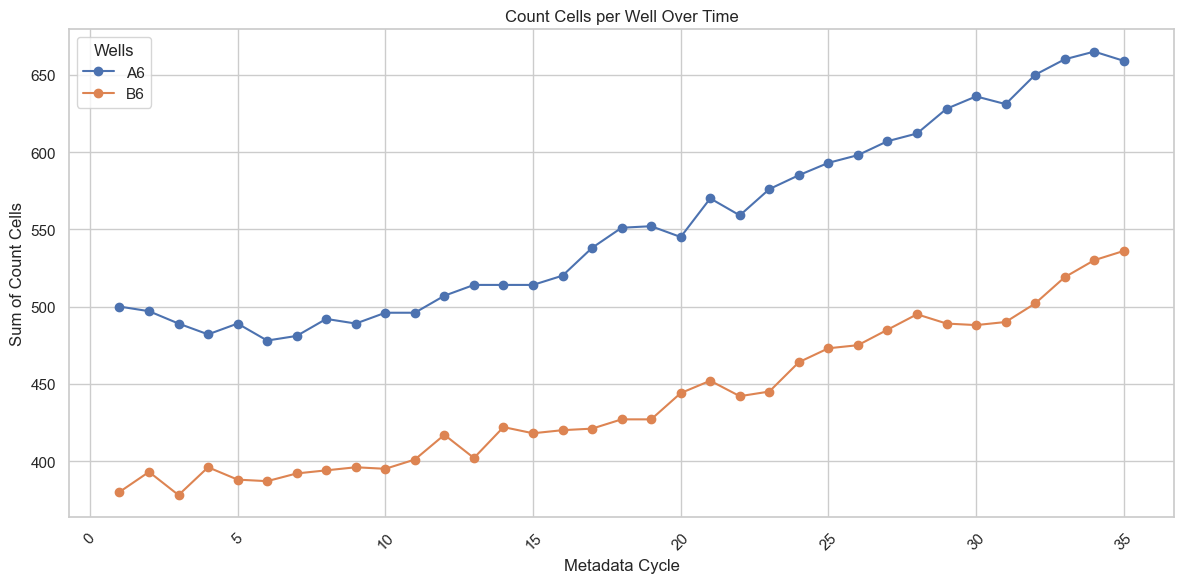

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_count_cells_per_well(csv_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Group by Metadata_Well and Metadata_Cycle, summing Count_Cells
    grouped_df = df.groupby(['Metadata_Well', 'Metadata_Cycle'], as_index=False)['Count_Cells'].sum()

    # Create a pivot table to have wells as rows and cycles as columns
    pivot_df = grouped_df.pivot(index='Metadata_Cycle', columns='Metadata_Well', values='Count_Cells').fillna(0)

    # Set the plot style
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(12, 6))
    for well in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[well], marker='o', label=well)

    # Add labels and title
    plt.xlabel('Metadata Cycle')
    plt.ylabel('Sum of Count Cells')
    plt.title('Count Cells per Well Over Time')
    plt.legend(title='Wells')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

    return grouped_df, pivot_df

# Example usage
csv_file_path = r'L:\lmu_active2\users\m\margauxh\CellProfiler\output\test1\MyExpt_Image.csv'  # Change this to your actual CSV file path
grouped_df, pivot_df = plot_count_cells_per_well(csv_file_path)

In [4]:
grouped_df.head()

,Metadata_Well,Metadata_Cycle,Count_Cells
0,A6,1,500.0
1,A6,2,497.0
2,A6,3,489.0
3,A6,4,482.0
4,A6,5,489.0


In [5]:
pivot_df.head()

Metadata_Well,A6,B6
Metadata_Cycle,,
1,500.0,380.0
2,497.0,393.0
3,489.0,378.0
4,482.0,396.0
5,489.0,388.0
